# Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, <i>retaining high profitable customers is the number one business goal.</i>

 

To reduce customer churn, telecom companies need to <b>predict which customers are at high risk of churn.</b>

The <b>business objective</b> is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="dark")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.metrics import sensitivity_specificity_support

#PCA 
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

##### Declare file path. To be modified according to the location of the path

In [2]:
#### read data
file_path='C:\\data\\anitha-ml\\Machine Learning\\Telecom Churn Case Study\\'

telecom = pd.read_csv(file_path+'telecom_churn_data.csv')


In [3]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Handling Missing values 

In [6]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

#### Considering the recharge columns first, since they contain higher percentage of null values.

In [7]:
recharge_columns = list(telecom.columns[telecom.columns.str.contains('_rech_')])

In [8]:
recharge_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [9]:
telecom[recharge_columns].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


#### Imputing 0 with columns having 1 as the minimum value. It could mean the customer didnt recharge that month


In [10]:
columns_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

telecom[columns_impute] =telecom[columns_impute].apply(lambda x : x.fillna(0))

In [11]:
##### Now again checking the null values first 30 

round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False).head(30)

fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
count_rech_3g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
night_pck_user_7            74.43
arpu_3g_7                   74.43
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
arpu_3g_8                   73.66
arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
count_rech_3g_8             73.66
fb_user_8                   73.66
night_pck_user_8            73.66
count_rech_2g_8             73.66
std_ic_t2o_mou_9             7.75
roam_og_mou_9 

In [12]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

#### Dropping date columns, since they really wouldnt help in our analysis. We already have columns ear marked for each of the columns

In [13]:
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_9',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8', 
             'date_of_last_rech_data_9'
            ]

telecom = telecom.drop(date_cols, axis= 1)


In [14]:
telecom.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

#### We see that we only have circle id 109 as part of our data set. Hence dropping it. We can also drop mobile number from the data set since it doesnt add much value to our analysis


In [15]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.

In [16]:


telecom = telecom.drop(['circle_id','mobile_number'], axis= 1)

telecom.shape


(99999, 212)

In [17]:
telecom.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.00000

#### Some of the columns have 0's and 1's . Analyzing the data of these columns 

In [18]:
categorical_columns = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8','night_pck_user_9',
             'fb_user_6', 'fb_user_7', 'fb_user_8','fb_user_9']

telecom[categorical_columns].isnull().sum()

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

#### Imputing Categorical columns

- It can be observed that good percentage of these columns values contain null values. However, they provide import information about whether the users use Night scheme or not and whether they use social networking sites. Hence lets impute null values with -1. That means the users have not opted for that scheme 

In [19]:
telecom[categorical_columns] = telecom[categorical_columns].apply(lambda x: x.fillna(-1))

In [20]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False).head(30)

arpu_2g_6           74.85
count_rech_2g_6     74.85
arpu_3g_6           74.85
count_rech_3g_6     74.85
arpu_2g_7           74.43
count_rech_2g_7     74.43
arpu_3g_7           74.43
count_rech_3g_7     74.43
count_rech_3g_9     74.08
arpu_3g_9           74.08
arpu_2g_9           74.08
count_rech_2g_9     74.08
count_rech_3g_8     73.66
count_rech_2g_8     73.66
arpu_3g_8           73.66
arpu_2g_8           73.66
std_og_t2c_mou_9     7.75
spl_ic_mou_9         7.75
std_og_mou_9         7.75
loc_og_t2c_mou_9     7.75
isd_og_mou_9         7.75
ic_others_9          7.75
loc_og_t2f_mou_9     7.75
isd_ic_mou_9         7.75
og_others_9          7.75
std_og_t2t_mou_9     7.75
loc_og_mou_9         7.75
std_og_t2f_mou_9     7.75
loc_og_t2m_mou_9     7.75
std_ic_t2f_mou_9     7.75
dtype: float64

#### Dropping columns with more that 70 % null values

In [21]:
columns_tobe_dropped = ['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                        'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9',
                        'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                       'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'
                        ]

telecom = telecom.drop(columns_tobe_dropped, axis=1)

In [22]:
telecom.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.00000

####  It can be observed that some of the columns only have 1 distinct value . We can drop them as well, since they wouldnt provide much value addition for the analysis


In [23]:
columns_with_unique_values = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                              'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                              'std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                              'std_ic_t2o_mou_8','std_ic_t2o_mou_9']

telecom = telecom.drop(columns_with_unique_values, axis=1)


In [24]:
telecom.shape

(99999, 185)

In [25]:
telecom.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,9

In [26]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False)

ic_others_9           7.75
roam_og_mou_9         7.75
isd_og_mou_9          7.75
loc_og_t2t_mou_9      7.75
std_ic_t2t_mou_9      7.75
std_og_mou_9          7.75
std_ic_t2m_mou_9      7.75
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
std_ic_t2f_mou_9      7.75
loc_og_mou_9          7.75
std_ic_mou_9          7.75
std_og_t2t_mou_9      7.75
og_others_9           7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
spl_ic_mou_9          7.75
loc_ic_mou_9          7.75
loc_og_t2m_mou_9      7.75
loc_ic_t2m_mou_9      7.75
spl_og_mou_9          7.75
offnet_mou_9          7.75
loc_ic_t2f_mou_9      7.75
loc_ic_t2t_mou_9      7.75
roam_ic_mou_9         7.75
isd_ic_mou_9          7.75
onnet_mou_9           7.75
spl_ic_mou_8          5.38
loc_ic_t2t_mou_8      5.38
std_og_t2f_mou_8      5.38
isd_ic_mou_8          5.38
loc_og_mou_8          5.38
std_og_t2m_mou_8      5.38
og_others_8           5.38
spl_og_mou_8          5.38
loc_ic_t2m_mou_8      5.38
std_og_t2t_mou_8      5.38
o

#### Most of the columns containing null values belong to 9th month. Probably the users have Churned. Hence there are no values. Lets replace the null values with with 0's 

In [27]:
columns_9 = telecom.columns[telecom.isna().any() & telecom.columns.str.contains(pat = '_9')] 
columns_9

Index(['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9'],
      dtype='object')

In [28]:
telecom[columns_9] = telecom[columns_9].apply(lambda x: x.fillna(0))

In [29]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False).head(100)

og_others_8         5.38
loc_ic_t2m_mou_8    5.38
isd_og_mou_8        5.38
loc_og_t2m_mou_8    5.38
ic_others_8         5.38
isd_ic_mou_8        5.38
loc_og_t2t_mou_8    5.38
std_og_mou_8        5.38
std_og_t2t_mou_8    5.38
spl_ic_mou_8        5.38
roam_og_mou_8       5.38
loc_og_t2c_mou_8    5.38
std_ic_mou_8        5.38
loc_og_t2f_mou_8    5.38
roam_ic_mou_8       5.38
std_ic_t2f_mou_8    5.38
std_og_t2f_mou_8    5.38
offnet_mou_8        5.38
std_ic_t2m_mou_8    5.38
loc_ic_t2t_mou_8    5.38
std_ic_t2t_mou_8    5.38
onnet_mou_8         5.38
loc_og_mou_8        5.38
loc_ic_mou_8        5.38
std_og_t2m_mou_8    5.38
loc_ic_t2f_mou_8    5.38
spl_og_mou_8        5.38
std_og_mou_6        3.94
std_og_t2f_mou_6    3.94
isd_og_mou_6        3.94
std_ic_t2m_mou_6    3.94
spl_og_mou_6        3.94
og_others_6         3.94
ic_others_6         3.94
isd_ic_mou_6        3.94
spl_ic_mou_6        3.94
std_ic_mou_6        3.94
loc_ic_t2t_mou_6    3.94
std_ic_t2f_mou_6    3.94
std_ic_t2t_mou_6    3.94


In [30]:
telecom.shape

(99999, 185)

In [31]:
null_counts = telecom.isnull().sum()
null_counts[null_counts > 0]

onnet_mou_6         3937
onnet_mou_7         3859
onnet_mou_8         5378
offnet_mou_6        3937
offnet_mou_7        3859
offnet_mou_8        5378
roam_ic_mou_6       3937
roam_ic_mou_7       3859
roam_ic_mou_8       5378
roam_og_mou_6       3937
roam_og_mou_7       3859
roam_og_mou_8       5378
loc_og_t2t_mou_6    3937
loc_og_t2t_mou_7    3859
loc_og_t2t_mou_8    5378
loc_og_t2m_mou_6    3937
loc_og_t2m_mou_7    3859
loc_og_t2m_mou_8    5378
loc_og_t2f_mou_6    3937
loc_og_t2f_mou_7    3859
loc_og_t2f_mou_8    5378
loc_og_t2c_mou_6    3937
loc_og_t2c_mou_7    3859
loc_og_t2c_mou_8    5378
loc_og_mou_6        3937
loc_og_mou_7        3859
loc_og_mou_8        5378
std_og_t2t_mou_6    3937
std_og_t2t_mou_7    3859
std_og_t2t_mou_8    5378
std_og_t2m_mou_6    3937
std_og_t2m_mou_7    3859
std_og_t2m_mou_8    5378
std_og_t2f_mou_6    3937
std_og_t2f_mou_7    3859
std_og_t2f_mou_8    5378
std_og_mou_6        3937
std_og_mou_7        3859
std_og_mou_8        5378
isd_og_mou_6        3937


### We can observe the same pattern for all the columns with null values. We can see that 6th month has 3937 rows with null values, while 7th month has 3859 rows and 8th month has 5378 rows with null values. Lets fill them as well with 0 since this looks like a clean dataset

In [32]:
telecom = telecom.fillna(0)

In [33]:
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.


## In churn prediction we assume three phases of customer life cycle
- Good Phase(6th and 7th month)
- Action Phase( 8th month)
- Churn Phase ( 9th month)

#### Lets try to filter high value customer based on the high revenue customer. Considering only the good phase for deriving the high value customers
##### Creating Total Recharge amount for Data (Mobile Internet) for 6th, 7th

In [34]:
telecom['total_rech_amt_data_6'] = telecom.av_rech_amt_data_6 * telecom.total_rech_data_6
telecom['total_rech_amt_data_7'] = telecom.av_rech_amt_data_7 * telecom.total_rech_data_7

##### Adding total recharge amount and total recharge data amount

In [35]:
telecom['tot_amt_rech_6'] = telecom.total_rech_amt_data_6 + telecom.total_rech_amt_6
telecom['tot_amt_rech_7'] = telecom.total_rech_amt_data_7 + telecom.total_rech_amt_7

#### Caculate Avg Recharge amount 

In [36]:
telecom['avg_recharge_amt_6_7'] = (telecom['tot_amt_rech_6'] + telecom['tot_amt_rech_7'])/2

#### Filtering high-value customers

We need to predict churn only for the high-value customers. 

High-value customers as follows: 
<i><b> Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).</b></i>

In [37]:
churn = telecom.loc[telecom.avg_recharge_amt_6_7 >= telecom.avg_recharge_amt_6_7.quantile(0.7), :]
churn = churn.reset_index(drop=True)
churn.shape

(30001, 190)

In [38]:
# delete variables created to filtering high-value customers
churn = churn.drop(['tot_amt_rech_6', 'tot_amt_rech_7',
                                      'total_rech_amt_data_6', 'total_rech_amt_data_7', 'avg_recharge_amt_6_7'], axis=1)
churn.shape

(30001, 185)

<b>We are left with 30001 rows. </b>

#### Lets try derive the churn customers

<b>Tag churners and remove attributes of the churn phase</b>

Now let's tag the churned customers (churn=1, else 0) based on the fourth month as follows: 

<i>Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes used to tag churners are : </i>
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [39]:
# Caculate the total incoming and outcoming calls made

churn['total_calls_mou_9'] = churn['total_og_mou_9'] + churn['total_ic_mou_9']

# Caculate the total internet data used
churn['total_internet_9'] = churn['vol_2g_mb_9'] + churn['vol_3g_mb_9']

#####  If both internet usage and calls minute are '0' we can assume that the customer has already churned. Hence based on this assumption lets derive Churn 

In [40]:
churn['churn'] = churn.apply(lambda x : 1 if (x['total_calls_mou_9'] ==0 and x['total_internet_9']==0) else 0, axis=1 )

In [41]:
# change data type to category
churn.churn = churn.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn.churn.value_counts()*100/len(churn.index))

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


##### After tagging churners, removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [42]:
churn = churn.filter(regex='[^9]$', axis=1)
churn.shape

(30001, 141)

## EDA processing 

In [43]:
# coverting categorical columns to category type and numeric columns to numeric type
categorical_columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
churn[categorical_columns] = churn[categorical_columns].apply(lambda x: x.astype('category'),axis=0)

# converting numerical columns
numeric_columns = [col for col in churn.columns if col not in categorical_columns]

churn[numeric_columns] = churn[numeric_columns].apply(pd.to_numeric)


##### Defining common method for plotting

In [44]:
# create box plot for  6th, 7th and 8th month
def plot_box_plot(df,attribute):
    plt.figure(figsize=(20,16))
    for i in range(1,4):
        plt.subplot(2,3,i)
        sns.boxplot(data=df, y=attribute+"_"+str(i+5),x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()
    

    
def showLabel(ax,val_format,d=None,space = 15):
    x_offset = -0.03
    y_offset = 0.02
    counts = {}
    locs, labels = plt.xticks() 
    i=0
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value
    for p in ax.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2
        if d is None:
            val = val_format.format(y_value)
        else:
            try:
                val = val_format.format(y_value) + " ( " + str(counts[str(labels[i].get_text())]) +" ) "
            except:
                val = val_format.format(y_value)

        ax.annotate(val, (x_value, y_value ), 
                    xytext=(0, space),
                    textcoords="offset points", 
                    ha='center',                
                    va='top',
                   fontsize=10)
        i = i+1

def plot_bar_plot(df,columns_list, value_format):
    plt.figure(figsize=(20,16))

    axs= df.groupby('churn')[columns_list].mean().T.plot.bar(figsize=(10,5),rot=0)
    axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
    showLabel(axs,value_format)
    
    plt.show()  

def plot_bar_chart_valcnt(df,columns_list, value_format):
    plt.figure(figsize=(20,16))

    axs= df[columns_list].value_count().plot.bar(figsize=(10,5),rot=0)
    axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
    showLabel(axs,value_format)
    
    plt.show() 

# create box plot for  6th, 7th and 8th month
def plot_cat_plot(df,attribute):
    for i in range(1,4):
        sns.catplot(data=df, x=attribute+"_"+str(i+5),hue='churn', kind='count')
    plt.show()
    
def plot_cnt_plt(df,attribute,value_format):
    plt.figure(figsize=(14,8))
    axs = sns.countplot(x = attribute, hue = 'churn',data = df,palette=("Accent_r"))
    axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
    showLabel(axs,value_format)
    plt.show(axs,value_format)

##### Recharge amount seems to be very important since they would given an insite about customer trend. Lets start analyzing by recharge columns

In [45]:
recharge_columns = list(churn.columns[churn.columns.str.contains('rech')])
recharge_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

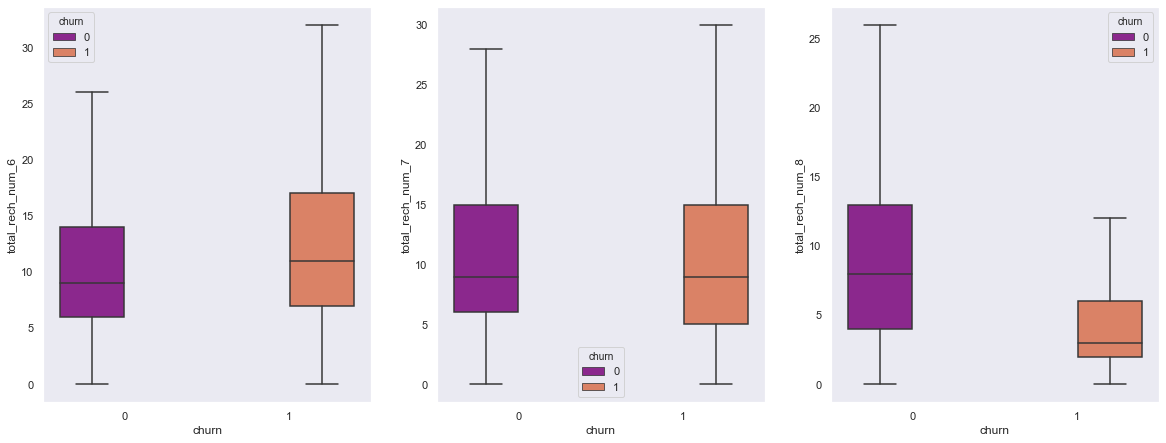

In [46]:
plot_box_plot(churn,'total_rech_num')

### Observation
> We can see a drop in the number of total recharges for churned customers in the 8th Month (Action Phase).

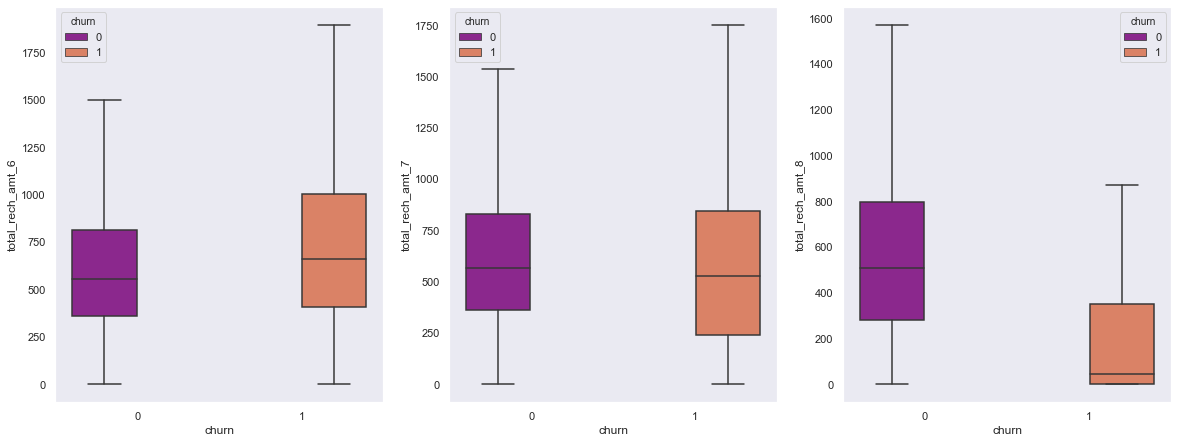

In [47]:
plot_box_plot(churn,'total_rech_amt')

### Observation
> We can see a drop in the total amount recharged for churned customers in the 8th Month (Action Phase).

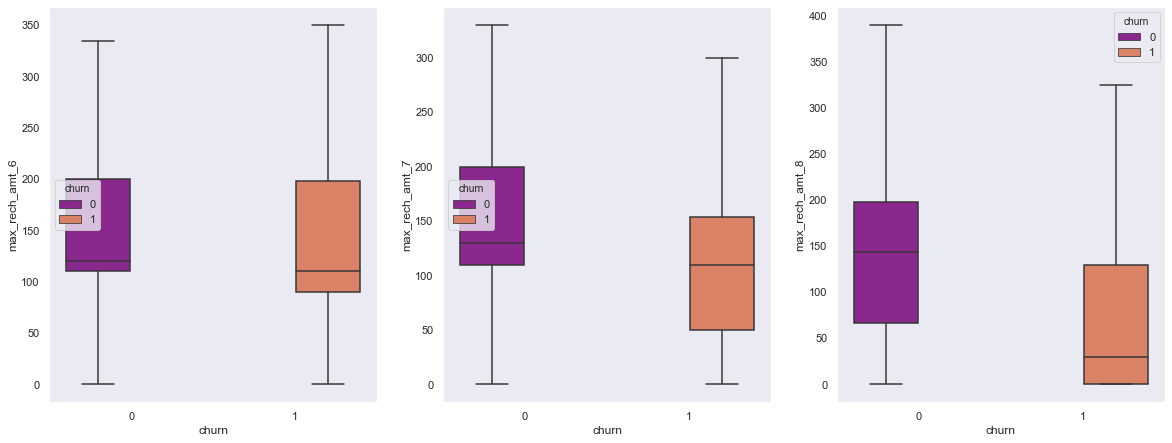

In [48]:
plot_box_plot(churn,'max_rech_amt')

### Observation
> We can see a drop in the Maximum amount recharged for churned customers in the 8th Month (Action Phase).
> <br/><b>Lets further Analyze the data recharge</b></br>

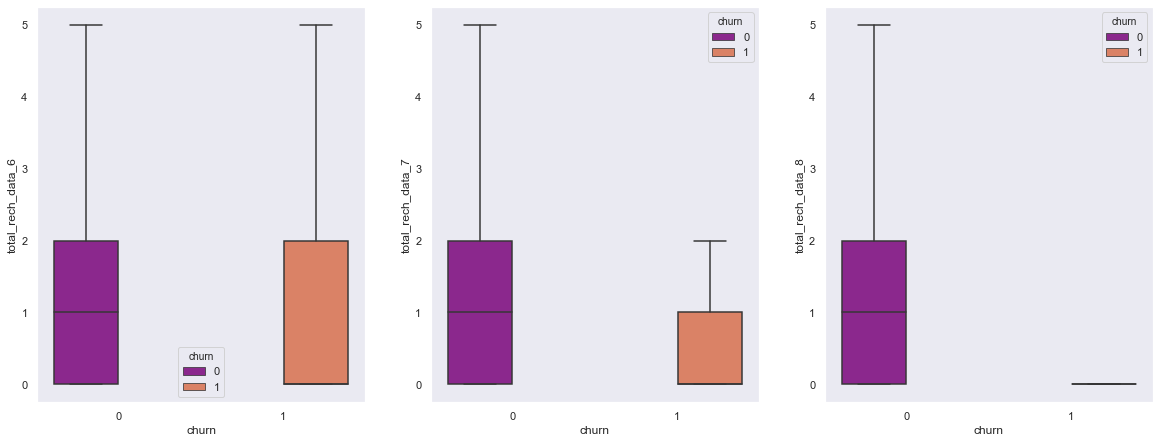

In [49]:
plot_box_plot(churn,'total_rech_data')

### Observation
> We can see that the Churned customers didnt recharge any data in the 8th Month (Action Phase).

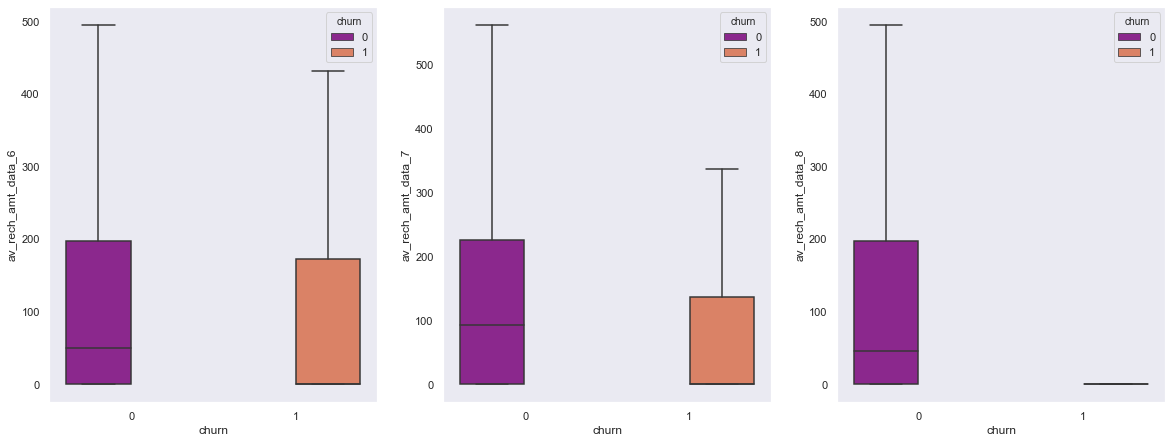

In [50]:
plot_box_plot(churn,'av_rech_amt_data')

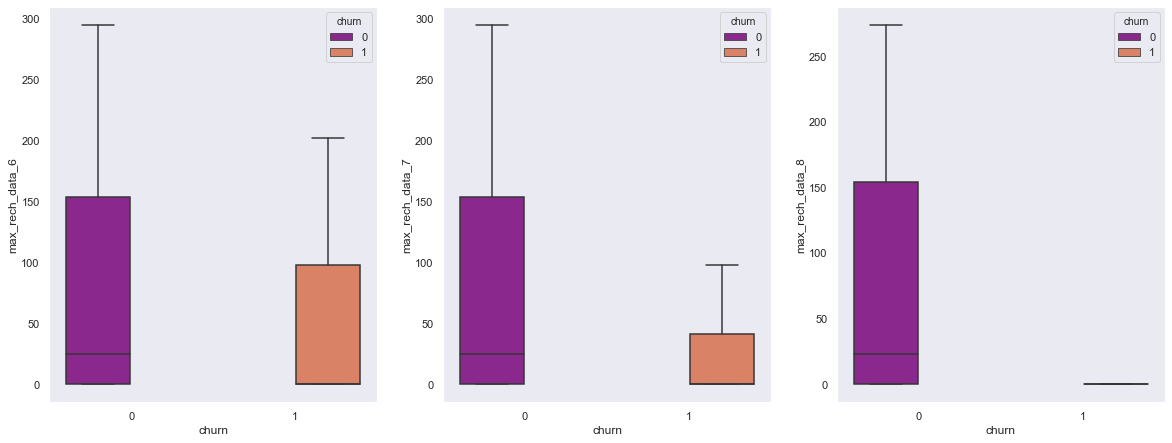

In [51]:
plot_box_plot(churn,'max_rech_data')

### Observation
> We can see that for the churned customers avg. recharge amount and the max rechage amount for the data is 0 during  the 8th Month (Action Phase).
- Data seems to play a vital part in the churned customers. 

### Lets further Analyze 2g and 3g Volume 

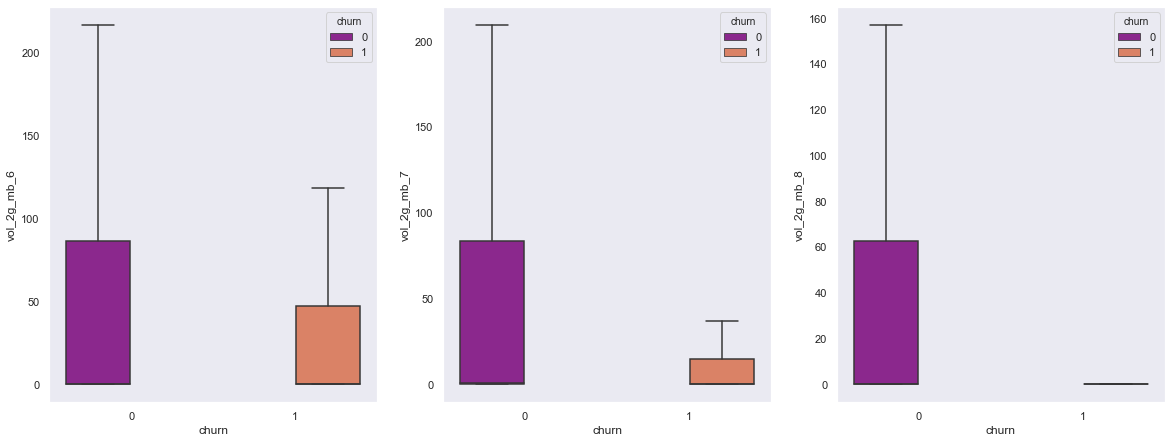

In [52]:
plot_box_plot(churn,'vol_2g_mb')

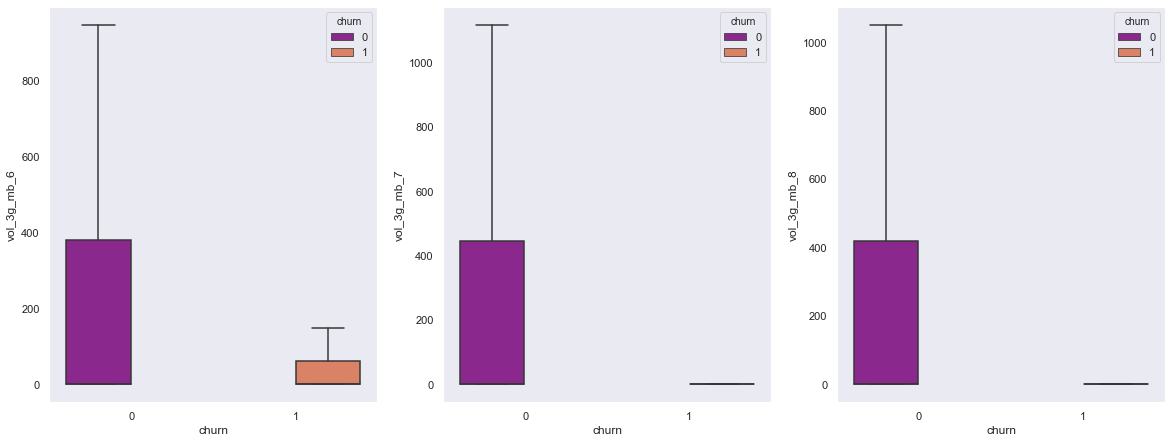

In [53]:
plot_box_plot(churn,'vol_3g_mb')

### Observation
> We can very well observe the following difference between Churned and Non-Churned Customers
- For both 2g and 3g customers, the usage drop extremely for the Churned customers during 7th and 8th month.
- Compared to Churned customers , non-churned customers seem to use more data. Possible reason could be better network coverage for the non-churned customers compare to the churned customers

##### Lets futher analyze the monthly 2g and 3g subscriptions

<Figure size 1440x1152 with 0 Axes>

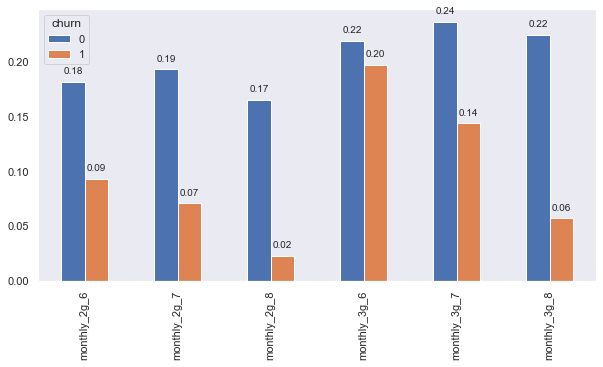

In [54]:
columns = churn.columns[churn.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

plot_bar_plot(churn,columns,"{:.2f}")

### Observation
> Both for 2g as well as 3g customers, we can a drop in monthly subscription for churned customers.

<Figure size 1440x1152 with 0 Axes>

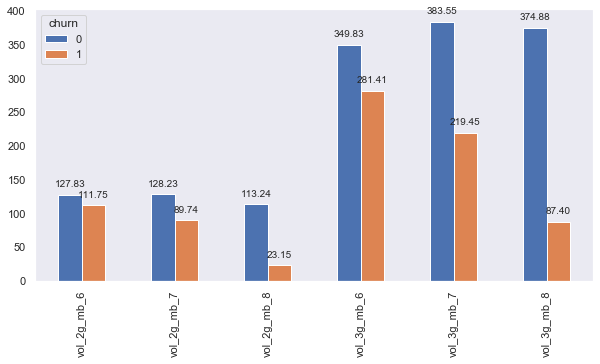

In [55]:
columns = churn.columns[churn.columns.str.contains('vol_2g|vol_3g',regex=True)]

plot_bar_plot(churn,columns,"{:.2f}")

### Observation
> We can observe that during the Action phase(8th month) , there is big drop in the internet usage volumne for both 2g as well as 3g for churned customers

In [56]:
columns = churn.columns[churn.columns.str.contains('vbc',regex=True)]
print('vbc columns Before Replace{}'.format(columns))

# Lets rename the columns in accordance with the format we follow
churn.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'},inplace=True)

columns = churn.columns[churn.columns.str.contains('vbc',regex=True)]

print('vbc columns After Replace{}'.format(columns))

# Let us drop the 9 month column since we dont need them 
churn = churn.drop('vbc_3g_9',axis=1)

vbc columns Before ReplaceIndex(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')
vbc columns After ReplaceIndex(['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'], dtype='object')


<Figure size 1440x1152 with 0 Axes>

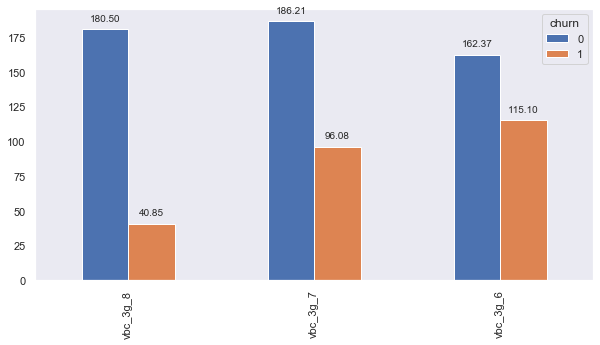

In [57]:
columns = churn.columns[churn.columns.str.contains('vbc',regex=True)]
plot_bar_plot(churn,columns,"{:.2f}")

<Figure size 1440x1152 with 0 Axes>

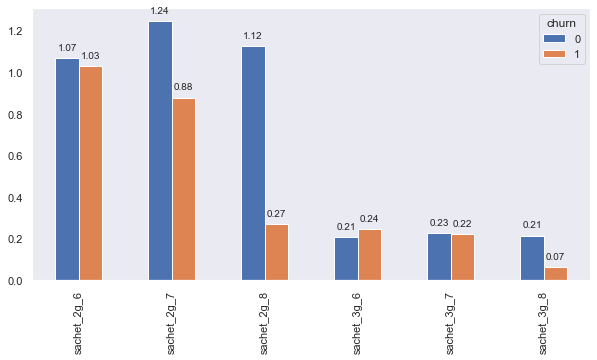

In [58]:
columns = churn.columns[churn.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

plot_bar_plot(churn,columns,"{:.2f}")

### Observation
> - We can observe that during the Action phase(8th month) , the vbc has dropped.
> - Similarly Service schemes with validity smaller than a month of both 2g and 3g see a downward trend during the Action Phase. 

#### Lets Further Analyze MOU

> To start with lets first analyze out going minutes of usage

In [59]:
columns = churn.columns[churn.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]
columns

Index(['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'total_og_mou_6', 'total_og_mou_7'],
      dtype='object')

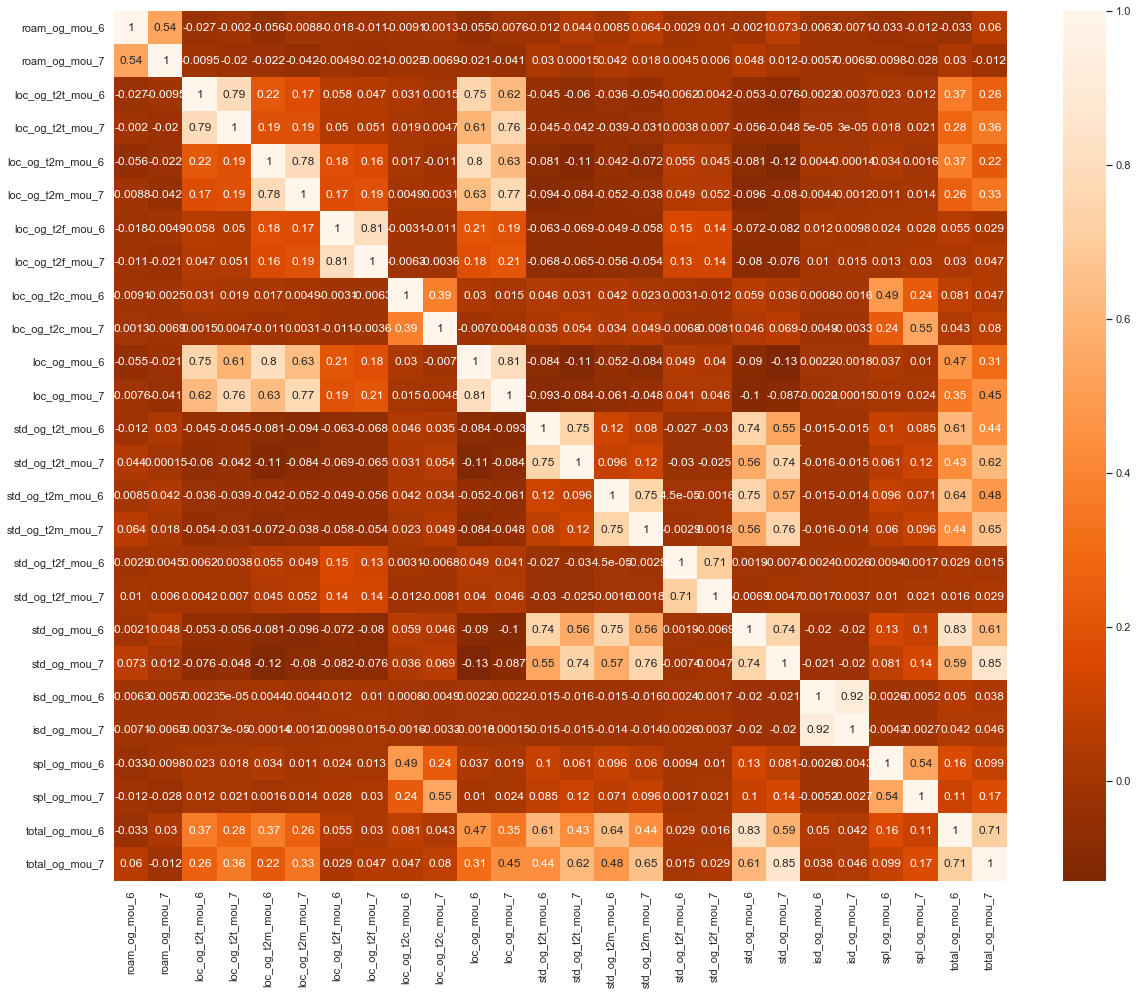

In [60]:
plt.figure(figsize=(20,16))
sns.heatmap(churn[columns].corr(),cmap='Oranges_r', annot=True)
plt.show()

### Observation
> - It can be observed that total_og_mou, std_og_mou and loc_og_mou seems to have higher correlation with other fields. 
> - Upon careful examination, it can be observed that total_og_mou, std_og_mou and loc_og_mou are combination of other fields. Hence dropping them, inorder to avoid multi collinearity

In [61]:
columns = list(churn.columns[churn.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)])
print('Columns being dropped are {} '.format(columns))
churn= churn.drop(columns, axis=1)

Columns being dropped are ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'] 


In [62]:
churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.

#### Lets analyze incoming calls minutes of usage

In [63]:
columns = churn.columns[churn.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]
columns

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_mou_6', 'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7'],
      dtype='object')

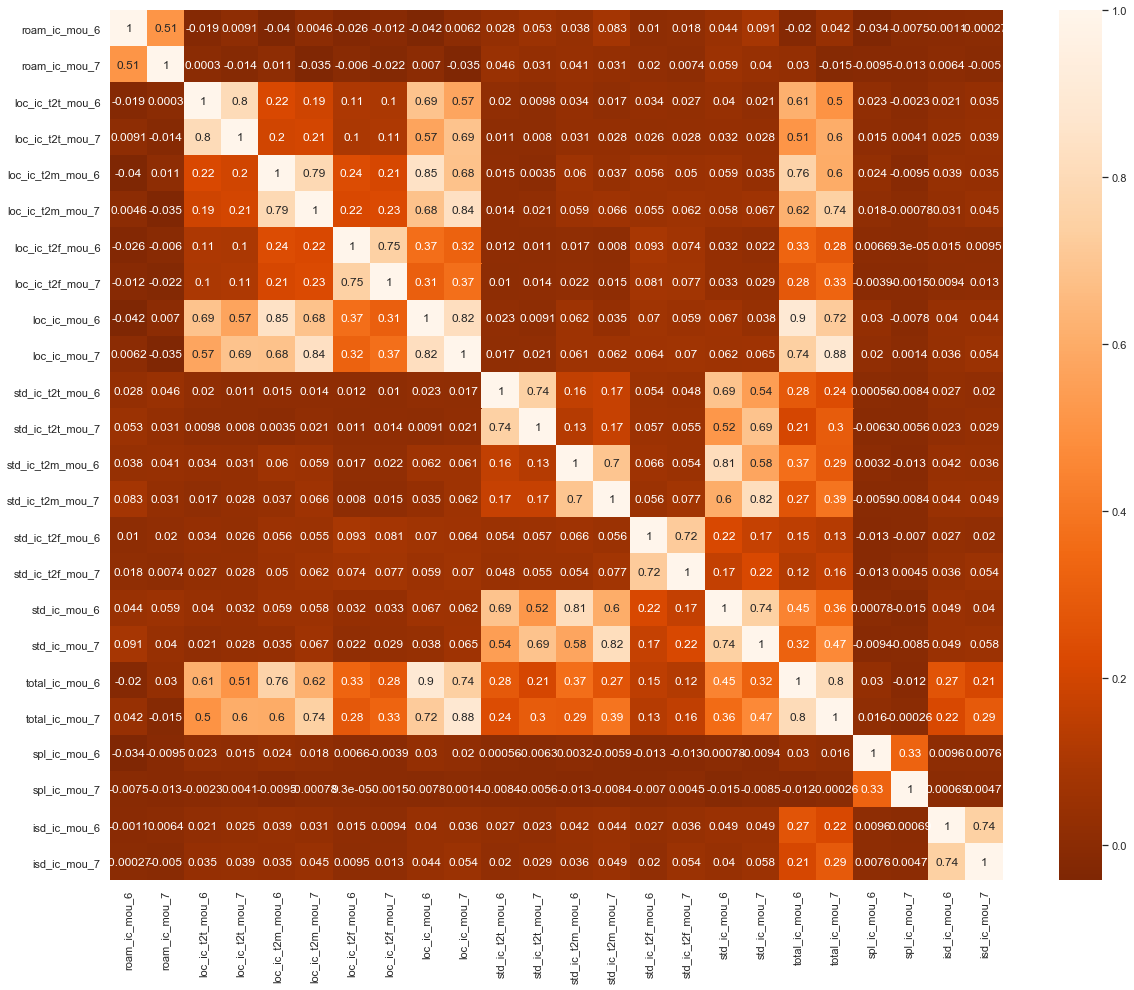

In [64]:
plt.figure(figsize=(20,16))
sns.heatmap(churn[columns].corr(),cmap='Oranges_r', annot=True)
plt.show()

### Observation
> - Similar to outgoing calls, it can be observed that total_ic_mou, std_ic_mou and loc_ic_mou seems to have higher correlation with other fields. This is because they are a combination of other fields. Hence dropping them, inorder to avoid multi collinearity

In [65]:
columns = list(churn.columns[churn.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)])
print('Columns being dropped are {} '.format(columns))
churn= churn.drop(columns, axis=1)

Columns being dropped are ['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'] 


#### Lets analyze Average revenue per user

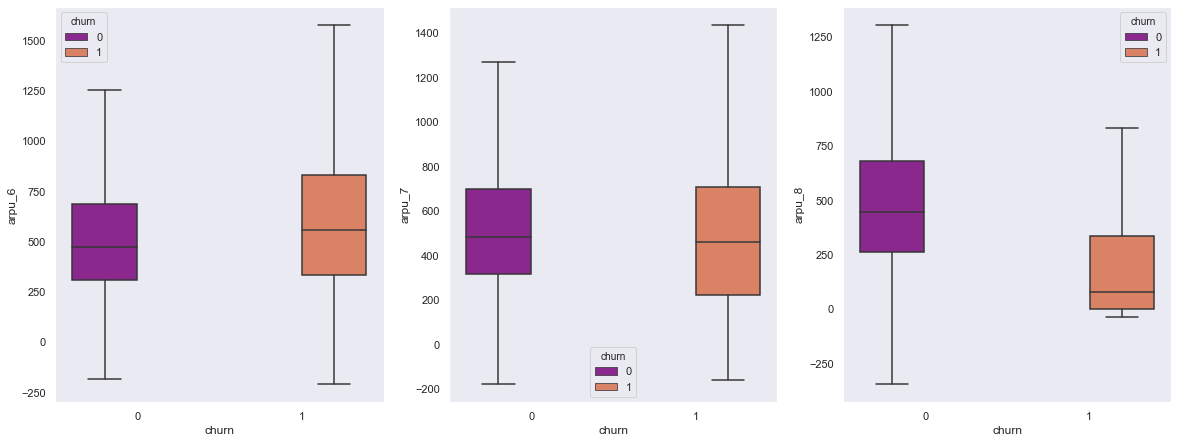

<Figure size 1440x1152 with 0 Axes>

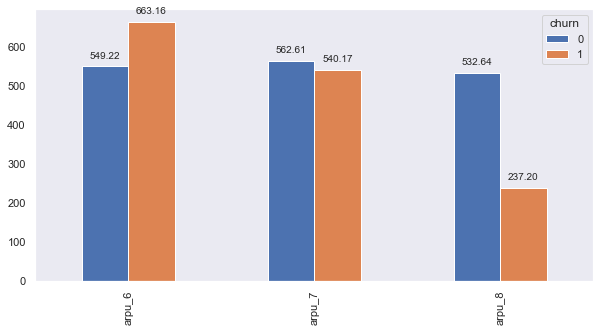

In [66]:
plot_box_plot(churn,'arpu')

columns = churn.columns[churn.columns.str.contains('arpu',regex=True)]

plot_bar_plot(churn,columns,"{:.2f}")

### Observation
> - It can be observed that the average revenue per user has considerably dropped during the action month and the average revenue per user has gradually increased. We can infer that the customers who didnt churn got a better service or were satisfied while churned customers were not happy with the service provided  by the telecom company

##### Lets now analyze offnet and onnet minutes of usage

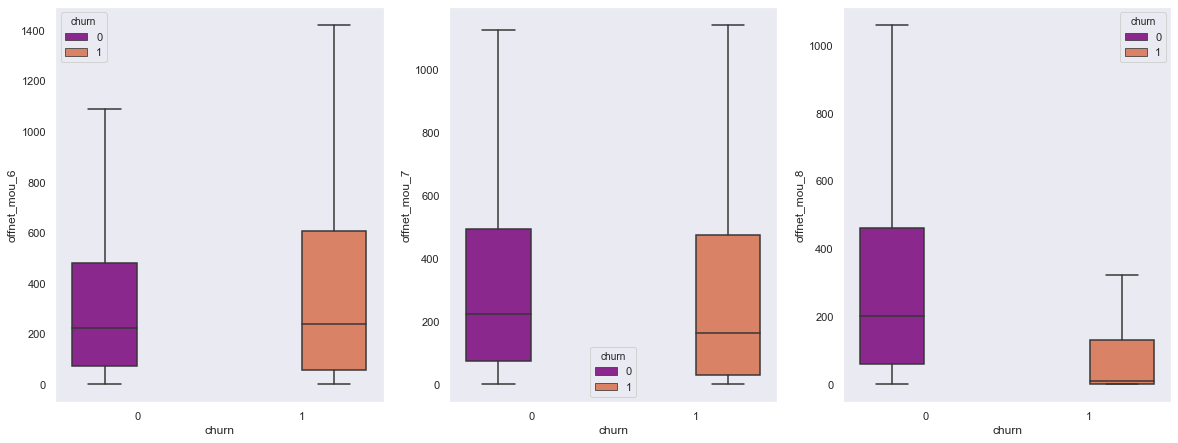

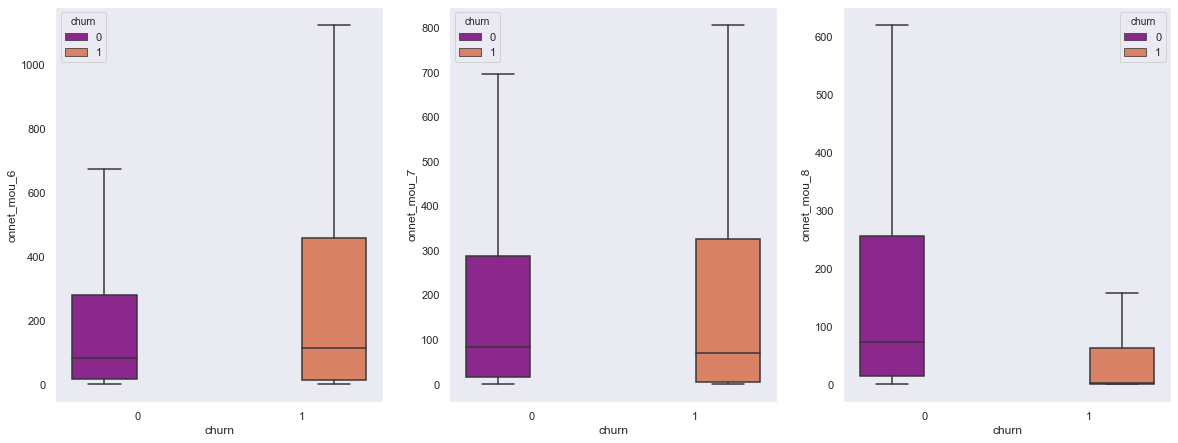

In [67]:
plot_box_plot(churn,'offnet_mou')
plot_box_plot(churn,'onnet_mou')

### Observation
> - Both offnet and onnet shows similar trend. For the churned customers, initially the usage was higher but grandually, decresed during the Action Phase. For Non-Churned customer though usage was less initially, it gradually has a upward trend

#### Lets analyze Age on Network

In [68]:
aon_range = [0, 6, 12, 24, 60, 61]
aon_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
aon_df = churn.copy()
# converting age on network to months 
aon_df['tenure'] = aon_df['aon']/30

aon_df['aon_range'] = pd.cut(aon_df['tenure'], aon_range, labels=aon_label)

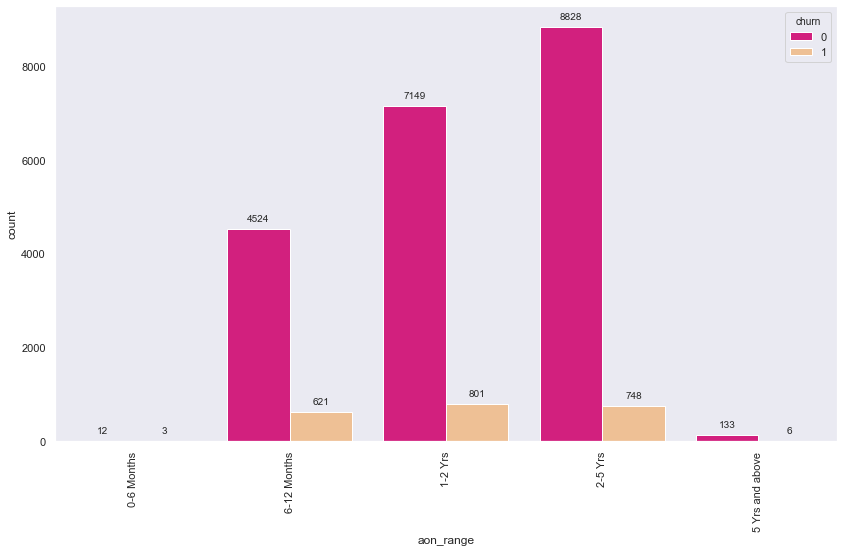

In [69]:
plot_cnt_plt(aon_df,'aon_range',"{:.0f}")

### Observation
> - From the above we can observe that number of users churning are higher between 6 month to 2 years. Beyong 5 years, its almost neglible. The users develop trust towards the network

## Derive New Features

In [70]:
churn_final = churn

In [71]:
churn_final.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,0
3,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [72]:
### Let us try to get the average of 6th and 7th month have them compared against the 8th month

In [73]:
numerical_columns = list(churn_final.filter(regex='_6|_7').select_dtypes(include=np.number).columns.str[:-2].unique())

for col in numerical_columns:
    churn_final['avg_'+col+'_67']= (churn_final[col+'_6'] +churn_final[col+'_7'])/2
    churn_final = churn_final.drop([col+'_6',col+'_7'], axis=1)


In [74]:
churn_final.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,churn,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_vbc_3g_67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,252,1.0,252.0,252.0,5.75,109.61,0.0,0.0,0.0,0,0,1,0,1.0,1.0,1.0,968,30.40,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
1,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,13.795,40.825,13.37,0.090,2.25,0.0,45.200,219.525,126.810,24.360,109.215,43.215,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
2,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,3.0,23.0,69.0,0.03,11.94,-1.0,0.0,0.0,0,3,0,0,-1.0,1.0,1.0,315,21.03,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,124.995,11.865,0.00,0.000,0.00,0.0,16.840,35.780,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405
3,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.0,19.54,129.16,10.39,0.18,101.74,0.00,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,-1.0,-1.0,-1.0,720,0.00,0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,111.935,737.050,0.00,0.000,0.00,0.0,6.335,96.430,3.725,10.020,52.960,0.000,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
4,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.0,76.64,146.84,0.71,13.38,43.91,0.00,0.0,3.74,13.06,4,439,179,0,2.0,179.0,270.0,0.01,1009.92,-1.0,0.0,0.0,0,0,1,1,-1.0,1.0,1.0,604,40.45,0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,0.000,4.355,0.00,0.005,0.05,0.0,40.875,104.635,0.000,0.255,8.660,0.000,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930


In [75]:
churn_final.shape

(30001, 84)

In [76]:
churn_final.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_loc_ic_t2t_mou_67,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_total_rech_data_67,avg_max_rech_data_67,avg_av_rech_amt_data_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_vbc_3g_67
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,508.597957,234.112539,335.077044,12.500551,19.865615,78.077112,151.756812,5.886385,1.707746,148.441175,157.350068,1.584734,1.948970,6.557204,0.057607,62.619432,146.232731,14.403175,13.913705,27.922597,2.561970,0.026567,10.998257,1.224455,9.972868,584.365454,160.144462,92.393654,1.621913,72.492917,122.132258,105.913072,351.493998,0.153628,1.054865,0.211026,0.202393,1209.368754,169.138860,559.636514,264.306159,375.898565,14.376429,23.361816,85.079520,163.126630,6.383899,1.73249,170.059634,183.677078,1.814799,2.138634,6.463458,0.351998,66.045108,151.018801,15.657016,15.158141,30.008866,2.747149,0.04040,11.330242,1.326893,11.784924,660.615179,170.743275,100.624813,1.760758,78.960685,135.218053,125.809755,357.227634,0.178877,1.140045,0.223393,0.218443,168.698363
std,501.961981,458.448598,482.062509,74.125281,104.719009,227.373609,233.660905,19.502281,7.208138,397.564547,409.100284,10.931804,44.712024,20.311857,3.315125,158.912293,214.882624,43.305191,71.338522,103.341828,19.896938,0.110697,70.600636,12.783238,9.274370,611.245907,173.207799,145.182324,2.996010,110.567519,195.586944,313.384838,919.021056,0.406486,2.535940,0.617549,1.100107,957.677989,420.974354,429.909145,439.579176,457.633472,66.078507,93.281425,222.279441,232.215248,20.955732,6.48236,385.607865,393.887902,11.529439,44.719965,17.314038,2.464511,157.153746,207.004076,44.348676,75.054257,93.957854,17.908139,0.15064,73.233106,13.728038,8.634676,515.173412,154.193137,115.928063,2.706465,103.209211,182.000971,300.031016,839.986477,0.387763,2.414776,0.571149,0.947966,392.776395
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [77]:
churn_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   30001 non-null  float64 
 1   onnet_mou_8              30001 non-null  float64 
 2   offnet_mou_8             30001 non-null  float64 
 3   roam_ic_mou_8            30001 non-null  float64 
 4   roam_og_mou_8            30001 non-null  float64 
 5   loc_og_t2t_mou_8         30001 non-null  float64 
 6   loc_og_t2m_mou_8         30001 non-null  float64 
 7   loc_og_t2f_mou_8         30001 non-null  float64 
 8   loc_og_t2c_mou_8         30001 non-null  float64 
 9   std_og_t2t_mou_8         30001 non-null  float64 
 10  std_og_t2m_mou_8         30001 non-null  float64 
 11  std_og_t2f_mou_8         30001 non-null  float64 
 12  isd_og_mou_8             30001 non-null  float64 
 13  spl_og_mou_8             30001 non-null  float64 
 14  og_oth

In [78]:
#convert churn column to numeric
churn_final['churn'] = pd.to_numeric(churn_final['churn'])

In [79]:
churn_final['churn'].describe()

count    30001.000000
mean         0.081364
std          0.273398
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [80]:
convert_categorical_columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

for col in convert_categorical_columns:
  churn_final[col] = pd.to_numeric(churn_final[col])

### Obsevervation
> After EDA and missing value handling we are left with 84 featurs. Lets start with Modelling

## Modelling

In [81]:
churn_final_model = churn_final.copy()
churn_final_model.shape

(30001, 84)

In [82]:
np.random.seed(1)

In [83]:
# Putting feature variable to X
X = churn_final_model.drop("churn", axis = 1)

# Putting response variable to 
y = churn_final_model.churn

In [84]:
print ("Shape of train datatset before : "+str(X.shape))
print ("Percenatge of Churned customer data : "+str(round(100*y.sum()/len(y),2)))

Shape of train datatset before : (30001, 83)
Percenatge of Churned customer data : 8.14


##### Since Our data favours non-churn customers more compared to churn customers , we have used StratifiedShuffleSplit instead of test_train_split. This help split the test and train data from both the groups equally

 ### Observation
> We are observing Class imbalance. Hence let's try to address the class imbalance using Advanced (Synthesized Minority Oversampling Technique)

## Addressing Class Imbalance

In [85]:
sm = SMOTE(sampling_strategy='not majority')
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape)
print(y_res.shape)

(55120, 83)
(55120,)


In [86]:
X= pd.DataFrame(X_res, columns= X.columns)
y= pd.DataFrame(y_res)

In [87]:
print ("Percenatge of Churned customer data : "+str(round(100*y_res.sum()/len(y_res),2)))
print ("Shape of datatset after : "+str(X.shape))
print ("Shape of datatset after : "+str(y.shape))

Percenatge of Churned customer data : 50.0
Shape of datatset after : (55120, 83)
Shape of datatset after : (55120, 1)


In [88]:
splitter = StratifiedShuffleSplit(n_splits=1,test_size=0.3,train_size=0.7,random_state=100)

for train,test in splitter.split(X,y_res):     #this will splits the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]


In [89]:
# checking shapes of train and test sets
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(38584, 83)
(38584, 1)
(16536, 83)
(16536, 1)


### Scaling Data and Standarizing them

In [90]:
# Scale Data 
scaler = StandardScaler()
X_col = X_train.columns
scaler.fit(X_train)

X_train_Scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


## PCA  - Applying PCA for dimensionality reduction

In [91]:
pca = PCA(random_state=42)

In [92]:
pca.fit(X_train_Scaled)

PCA(random_state=42)

In [93]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.47, 21.74, 27.33, 31.91, 35.67, 39.12, 42.22, 45.13, 47.89,
       50.53, 52.94, 55.24, 57.42, 59.54, 61.51, 63.43, 65.23, 66.92,
       68.56, 70.14, 71.66, 73.13, 74.56, 75.95, 77.2 , 78.36, 79.46,
       80.51, 81.5 , 82.46, 83.37, 84.24, 85.08, 85.89, 86.69, 87.47,
       88.24, 88.98, 89.68, 90.37, 91.  , 91.52, 92.02, 92.49, 92.94,
       93.38, 93.82, 94.24, 94.63, 95.  , 95.35, 95.69, 96.02, 96.33,
       96.63, 96.92, 97.2 , 97.47, 97.74, 98.  , 98.25, 98.47, 98.67,
       98.86, 99.04, 99.21, 99.35, 99.48, 99.59, 99.69, 99.75, 99.8 ,
       99.85, 99.88, 99.91, 99.93, 99.95, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96])

#### Making a scree plot for the explained variance

In [94]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

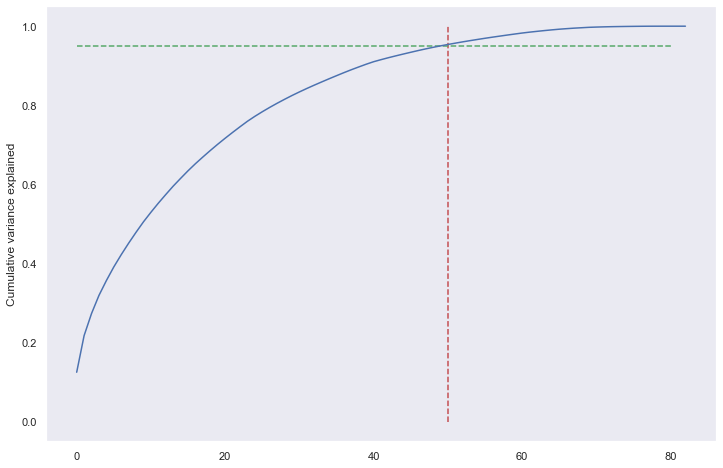

In [95]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#####  95% variance is explained by 50 components

In [96]:
pca_final =  PCA(.95) 

In [97]:
pca_final.fit(X_train_Scaled)

X_train_pca = pca_final.transform(X_train_Scaled)
X_test_pca  = pca_final.transform(X_test_scaled)

In [98]:
X_train_pca.shape
n_pcs= pca_final.components_.shape[0]


In [99]:
# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca_final.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X_train.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pca_important_components = pd.DataFrame(sorted(dic.items()),columns={'components','features'})

pca_important_components

,features,components
0,PC1,avg_av_rech_amt_data_67
1,PC10,avg_std_ic_t2f_mou_67
2,PC11,avg_ic_others_67
3,PC12,ic_others_8
4,PC13,og_others_8
5,PC14,avg_std_ic_t2t_mou_67
6,PC15,avg_last_day_rch_amt_67
7,PC16,std_ic_t2m_mou_8
8,PC17,loc_ic_t2f_mou_8
9,PC18,sachet_3g_8


In [100]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [101]:
corrmat.shape

(50, 50)

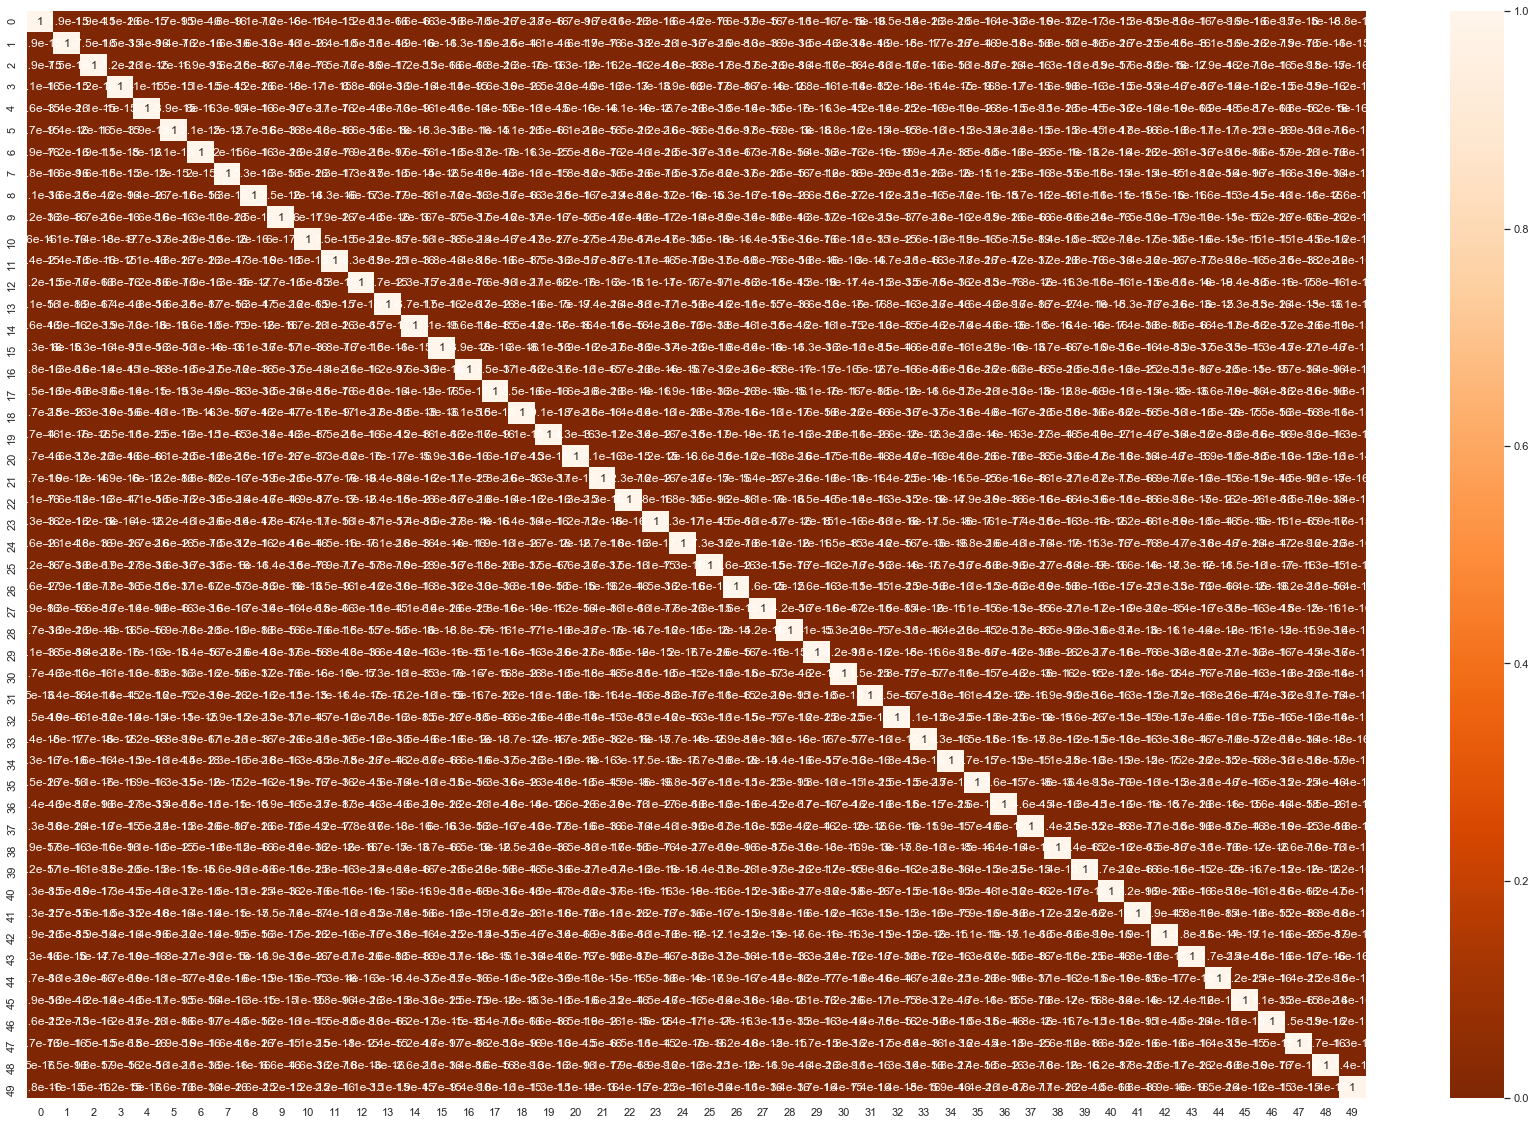

In [102]:
#plotting heat map for corr matrix
plt.figure(figsize=[30,20])
sns.heatmap(corrmat, annot=True,cmap='Oranges_r')

#### Observation : As you can see from the heatmap, there are no highly correlated varaibles, thus avoiding multicorilineariy

### Hyper Parameter Tuning for Logistic Regression

> Lets try to tune Logistic regression hyper parameter and see whether we could get a better results

In [103]:
# Instantiating Logistic regression
logistic = LogisticRegression()


#hyper parameters
params = {'C': [0.001, 0.01,0.1,1.0, 10,100]}

# Define folds
folds= StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

#GridSearchCV
model_cv = GridSearchCV(
                       estimator = logistic,
                       param_grid = params,
                       cv = folds,
                       return_train_score=True,
                       verbose=1,
                       scoring = 'accuracy',
                       n_jobs=3)


In [104]:
model_cv.fit(X_train_pca,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    7.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [105]:
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.293235,0.042536,0.006593,0.004713,0.001,{'C': 0.001},0.822599,0.828560,0.827912,0.827135,0.831519,0.827545,0.002884,6,0.830661,0.828198,0.828911,0.828101,0.826390,0.828452,0.001380
1,0.404371,0.038484,0.003996,0.000002,0.01,{'C': 0.01},0.827653,0.835428,0.833355,0.833744,0.835277,0.833091,0.002839,5,0.836265,0.833090,0.834613,0.833155,0.832189,0.833862,0.001431
2,0.475128,0.013638,0.004796,0.000979,0.1,{'C': 0.1},0.828301,0.835687,0.833873,0.834392,0.837221,0.833895,0.003027,4,0.836784,0.833641,0.835196,0.833382,0.832804,0.834361,0.001447
3,0.465137,0.043502,0.004196,0.000749,1,{'C': 1.0},0.828431,0.835947,0.834132,0.834651,0.836962,0.834025,0.002967,3,0.837010,0.833447,0.835326,0.833317,0.832804,0.834381,0.001568
4,0.433952,0.025216,0.003798,0.000400,10,{'C': 10},0.828431,0.835817,0.834132,0.834651,0.837092,0.834025,0.002977,1,0.837075,0.833512,0.835358,0.833285,0.832772,0.834400,0.001597
5,0.394175,0.011986,0.004195,0.000398,100,{'C': 100},0.828431,0.835817,0.834132,0.834651,0.837092,0.834025,0.002977,1,0.837075,0.833512,0.835358,0.833285,0.832772,0.834400,0.001597


In [106]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)

Best AUC:  0.8340245455943343
Best hyperparameters:  {'C': 10}


#### Final Logistic Regression Model with the Hyper parameters

In [107]:
# Making the Final Classification model.
logistic_regression = LogisticRegression( C = 1.0)
logistic_regression.fit(X_train_pca, y_train)

LogisticRegression()

In [108]:
y_train_pred = logistic_regression.predict(X_train_pca)

y_pred = logistic_regression.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = logistic_regression.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print ("\nClassification Report:\n\n", classification_report(y_test,y_pred))


[[6713 1555]
 [1168 7100]]
Sensitivity: 	0.86
Specificity: 	0.81
AUC:    	 0.91

Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.81      0.83      8268
           1       0.82      0.86      0.84      8268

    accuracy                           0.84     16536
   macro avg       0.84      0.84      0.84     16536
weighted avg       0.84      0.84      0.84     16536



## Random Forest

### Hyper Parameter Tuning for Random Forest

In [119]:
# Defining random forest with class weight as balanced
forest = RandomForestClassifier()

# hyperparameter space
param_grid = {
    'max_depth': [12,18],
    'n_estimators': [200,300],
    'max_features': [30,40,50]
}


# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# create gridsearch object
model_cv = GridSearchCV(estimator=forest, 
                        cv=folds, 
                        param_grid=param_grid, 
                        scoring='accuracy', 
                        return_train_score=True, 
                        verbose=1,
                        n_jobs = 3)

In [120]:
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  36 out of  36 | elapsed: 39.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'max_depth': [12, 18], 'max_features': [30, 40, 50],
                         'n_estimators': [200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [123]:
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,102.398588,0.091319,0.685276,0.013662,12,30,200,"{'max_depth': 12, 'max_features': 30, 'n_estim...",0.943710,0.941840,0.943317,0.942956,0.000805,8,0.971036,0.972398,0.970066,0.971167,0.000957
1,151.386961,0.263621,1.122858,0.010638,12,30,300,"{'max_depth': 12, 'max_features': 30, 'n_estim...",0.944721,0.941606,0.942695,0.943007,0.001291,7,0.971153,0.971815,0.970454,0.971141,0.000556
2,146.216159,0.323754,0.827885,0.031351,12,40,200,"{'max_depth': 12, 'max_features': 40, 'n_estim...",0.943399,0.941762,0.942151,0.942437,0.000698,9,0.970376,0.971660,0.969988,0.970674,0.000714
3,196.718526,0.126317,1.233297,0.081370,12,40,300,"{'max_depth': 12, 'max_features': 40, 'n_estim...",0.943866,0.939974,0.941762,0.941867,0.001591,10,0.969909,0.971893,0.969871,0.970558,0.000944
4,163.037091,0.031330,0.674617,0.007110,12,50,200,"{'max_depth': 12, 'max_features': 50, 'n_estim...",0.943010,0.940829,0.941295,0.941712,0.000938,11,0.969520,0.971387,0.969677,0.970195,0.000846


In [124]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)

Best AUC:  0.9514306333427524
Best hyperparameters:  {'max_depth': 18, 'max_features': 40, 'n_estimators': 200}


In [125]:
# Defining random forest with class weight as balanced
forest = RandomForestClassifier(
                                max_features= 40,
                                max_depth=18,
                                oob_score=True, 
                                verbose=1,
                                n_estimators=200,
                                n_jobs=-1
                               )

In [126]:
forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished


RandomForestClassifier(max_depth=18, max_features=40, n_estimators=200,
                       n_jobs=-1, oob_score=True, verbose=1)

In [127]:
# predict churn on test data
y_pred = forest.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = forest.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print ("\nClassification Report:\n\n", classification_report(y_test,y_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


[[7807  461]
 [ 260 8008]]
Sensitivity: 	0.97
Specificity: 	0.94
AUC:    	 0.99

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.94      0.96      8268
           1       0.95      0.97      0.96      8268

    accuracy                           0.96     16536
   macro avg       0.96      0.96      0.96     16536
weighted avg       0.96      0.96      0.96     16536



[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.2s finished



# Feature Selection





In [128]:
# predictors
features = X_train.columns

# feature_importance
importance = forest.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())


Sum of importance= 100.00000000000003


# Model Recommendation for Business
## Logistic regression
1.   Over all we got an accuracy of 0.84
2.   Sensitivity and specificity were 0.86 and 0.81 respectively

## Random Forest

1.   Over all we got an accuracy of 0.96. Which was very good
2.   Sensitivity and specificity were 0.97 and 0.99 respectively

***From the above model comparisons we can use Random Forest which gives good accuracy and sensitivity and specificity vales were good as well ***





# Feature Selection for business to consider

In [129]:
feature_importance

,variables,importance_percentage
0,loc_ic_t2m_mou_8,20.036926
1,roam_og_mou_8,10.086198
2,total_rech_amt_8,8.312759
3,roam_ic_mou_8,5.366028
4,night_pck_user_8,5.080023
5,fb_user_8,4.456314
6,arpu_8,3.924764
7,loc_ic_t2t_mou_8,3.515560
8,last_day_rch_amt_8,3.222771
9,total_rech_data_8,1.529712


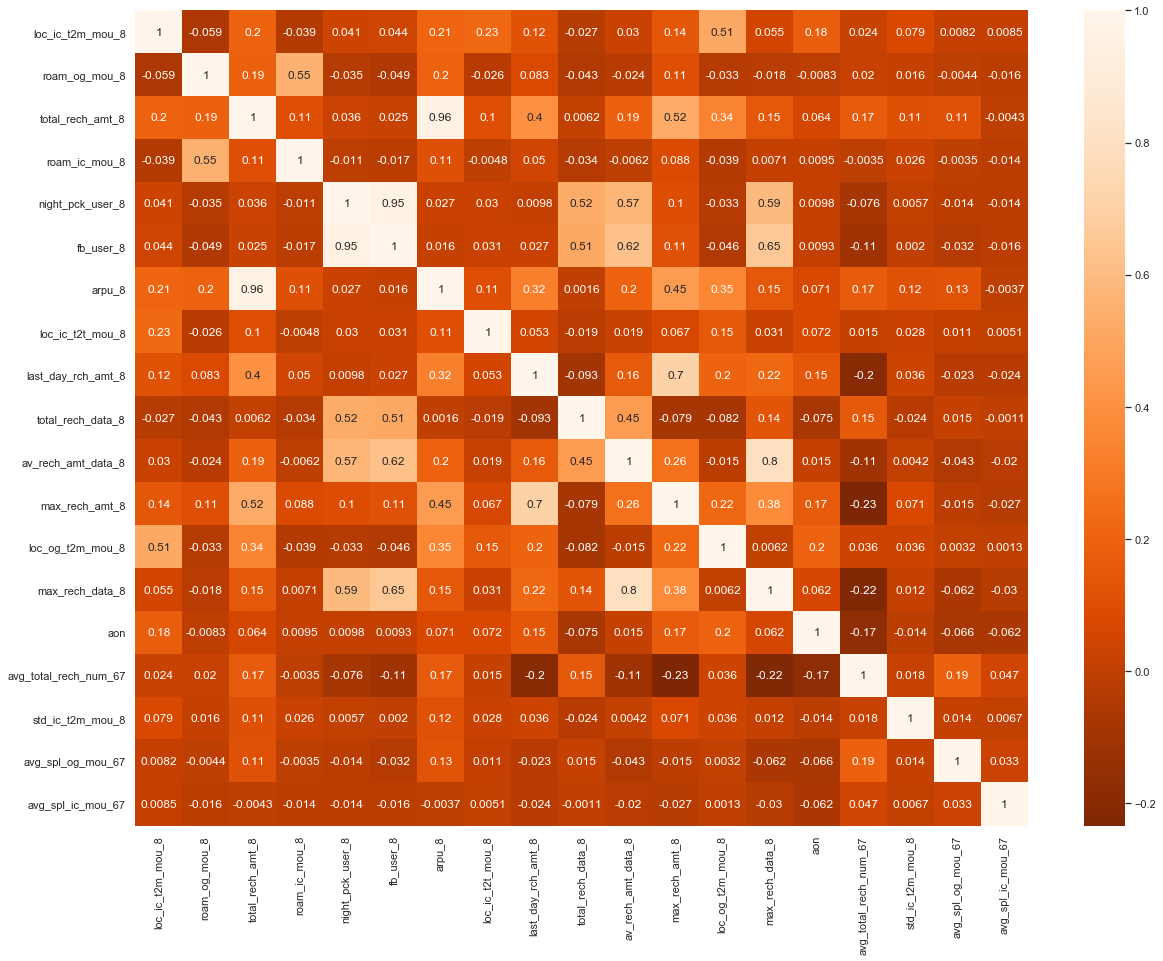

In [132]:
plt.figure(figsize=(20,15))
## Considering features with values greater than 0.95 importance
top_features = list(feature_importance[feature_importance.importance_percentage>0.70].variables)
sns.heatmap(data=churn_final[top_features].corr(), cmap='Oranges_r',annot=True)
plt.show()

# Business Recommendation

> 1.   Overall revenue generated by the customers play an important role in finding whether the users would churn or not
> 2.   Age on network is another factor which needs to be considered. Users who were with network for less than 5 years tend to churn more. So the company should try to provide more scheme for these customers and attract them
> 3. Std and ISD charges seem to play an important role. The company should concentrate on these and see what the competitors are offering to the customers and should try to role out a competitive schemes.
> 4. Roaming charges seem to play an important role. The company should role out good schemes for the customers who are in the roaming areas.
> 5. Some better schemes on night packs and monthly packs for data may help the business as well 




